In [1]:
from __future__ import annotations
from oop_functions.classifier_oop import *
from oop_functions.util_functions import *
from oop_functions.merge_dataset_functions import *
from oop_functions.analytics_oop import *

from xgboost import XGBClassifier

In [2]:
processed_data = pd.read_csv('./processed_dataset/recent_propagated_dataset.csv', index_col=0)

In [ ]:
# drop non-cancer records without screen records
condition = (processed_data['was_screened'] == 1) | (processed_data['ovar_cancer'] == 1)
processed_data_filtered = processed_data[condition]

In [ ]:
year = 1
label = f'cancer_in_next_{year}_years'
source_df = processed_data_filtered
# source_df = resample_class(source_df, label, 0, 20000)

In [ ]:

class ExperimentDataHelper1(ExperimentDataHelper):
    def _init_imputer(self) -> None:
        impute_const_dict = {
            'numcyst': 0,
            'ovcyst_morph': 0,
            'ovcyst_outline': 0,
            'ovcyst_solid': 0,
            'ovcyst_sum': 0,
            'ovcyst_vol': 0,
            'numcyst': 0,
            'tvu_result': 1,
            'numcystl': 0,
            'numcystr': 0,
            'ovcyst_diaml': 0,
            'ovcyst_diamr': 0,
            'ovcyst_morphl': 0,
            'ovcyst_morphr': 0,
            'ovcyst_outlinel': 0,
            'ovcyst_outliner': 0,
            'ovcyst_solidl': 0,
            'ovcyst_solidr': 0,
            'ovcyst_suml': 0,
            'ovcyst_sumr': 0,
            'ovcyst_voll': 0,
            'ovcyst_volr': 0,
            'visboth': 0,
            'viseith': 0,
            'visl': 0,
            'visr': 0
        }
        numeric_columns = select_numeric_columns(self.source_df)
        numeric_columns = list(set(numeric_columns) - set(impute_const_dict.keys()))
        self.imputer_util = ImputerUtil(impute_const_dict, impute_mean_cols=numeric_columns, impute_median_cols=[])

In [ ]:
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
experiment_data_helper = ExperimentDataHelper1(source_df, label, ['cancer_'])


In [ ]:
data_util_lambdas = experiment_data_helper.train_test_split_util.split_kfold(5)


In [ ]:
data_util = data_util_lambdas[0]()


In [10]:
data_util.get_stats()

Distribution of positive labels based on duplicate plco_id: 0.0112762451171875


In [11]:
data_util.train_df

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,uterine_fib,visboth,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f
336161,R-058112-5,65.0,2.0,0.0,0.0,0.0,0.000000,1.0,2.000000,5.0,...,0.0,0,1,0,1,10.765625,1.0,145.0,155.0,180.0
45025,B-067860-9,65.0,2.0,1.0,0.0,6.0,0.000000,0.0,1.477539,0.0,...,0.0,0,1,0,1,44.593750,1.0,150.0,226.0,229.0
371799,S-085104-9,65.0,0.0,0.0,1.0,1.0,0.000000,1.0,1.000000,5.0,...,1.0,0,0,0,0,10.765625,1.0,105.0,150.0,160.0
518071,W-061753-2,70.0,2.0,0.0,1.0,4.0,0.000000,1.0,1.000000,2.0,...,0.0,0,0,0,0,10.765625,1.0,127.0,137.0,122.0
43411,B-061884-5,75.0,1.0,1.0,1.0,5.0,0.000000,1.0,2.000000,1.0,...,0.0,0,0,0,0,10.765625,0.0,108.0,125.0,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430799,U-027515-8,70.0,2.0,1.0,0.0,0.0,1.000000,1.0,2.000000,5.0,...,1.0,0,0,0,0,10.765625,1.0,128.0,137.0,195.0
307627,Q-054421-4,55.0,0.0,1.0,0.0,0.0,1.000000,0.0,1.477539,0.0,...,0.0,0,1,0,1,2.599609,1.0,114.0,155.0,187.0
52919,B-098091-3,60.0,1.0,0.0,1.0,4.0,0.000000,0.0,1.477539,0.0,...,0.0,0,0,0,0,10.765625,0.0,120.0,136.0,144.0
479362,V-065703-3,75.0,0.0,0.0,0.0,0.0,0.284668,1.0,1.000000,1.0,...,1.0,0,0,0,0,10.765625,1.0,120.0,135.0,139.0


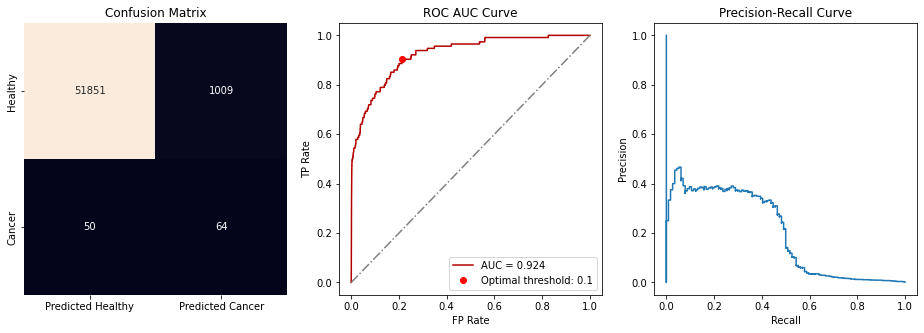

In [12]:
analytics_util.get_report_generation_util().display_graph()